In [86]:
from tqdm.notebook import tqdm
from glob import glob
import os
import random
import av
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
from insightface.utils import face_align 


def video2numpy(path):
    container = av.open(path)
    frames = {}
    for idx, frame in enumerate(container.decode(video=0)):
        numpy_RGB = np.array(frame.to_image())
        frames[idx] = numpy_RGB
    container.close()

    return frames


all_faces_paths = glob(f'../CAER/faces/*/*')
print(f"there are {len(all_faces_paths)} pickles")
facepath = random.choice(all_faces_paths)
print(facepath)


videopath_a = facepath.replace('faces', 'raw-videos').replace('.pkl', '.mp4')
videopath_b = facepath.replace('faces', 'raw-videos').replace('.pkl', '.avi')

if os.path.isfile(videopath_a):
   videopath = videopath_a
elif os.path.isfile(videopath_b):
   videopath = videopath_b
else:
    raise FileNotFoundError(f"{facepath} does not have the corresponding video.")

print(videopath)
frames = video2numpy(videopath)


there are 56 pickles
../CAER/faces/train/train-neutral-2766.pkl
../CAER/raw-videos/train/train-neutral-2766.avi


0.9958444237709045 0 30
0.9596689343452454 0 27


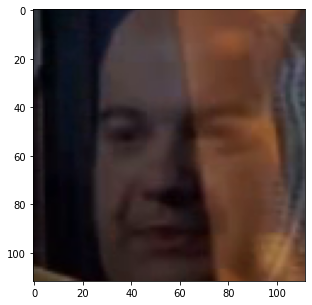

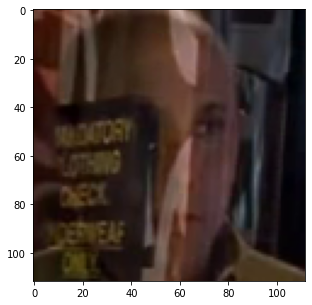

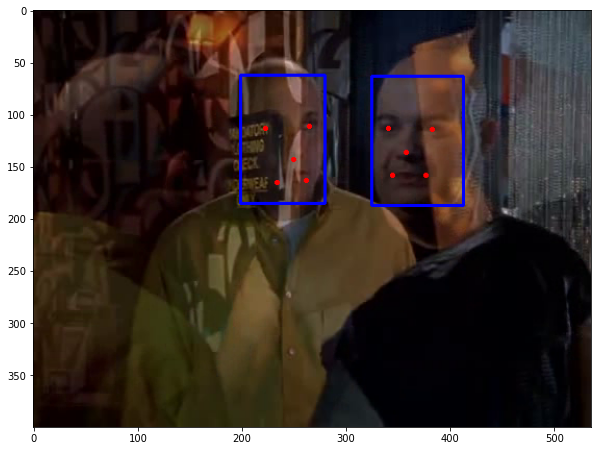

In [87]:
frame_num = random.choice(list(frames.keys()))
img = frames[frame_num]
detections = pickle.load(open(facepath ,'rb'))[frame_num]

for det in detections:

    plt.figure(figsize=(5, 5))
    plt.imshow(face_align.norm_crop(img, landmark=det.landmark))    

for det in detections:
    box = det.bbox.astype(np.int)
    color = (0, 0, 255)
    cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), color, 2)
    print(det.det_score, det.gender, det.age)
    for landmark in det.landmark.astype(np.int):
        color = (255, 0, 0)
        cv2.circle(img, (landmark[0], landmark[1]), 1, color, 2)

plt.figure(figsize=(10, 10))
plt.imshow(img)